# Data science capstone projects

<br>

## 1) Calls project

Dataset: https://www.kaggle.com/mchirico/montcoalert

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
df = pd.read_csv('911.csv')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Context (please refer to the Kaggle url): <br> <br>
lat : String variable, Latitude <br>
lng: String variable, Longitude <br>
desc: String variable, Description of the Emergency Call <br>
zip: String variable, Zipcode <br>
title: String variable, Title <br>
timeStamp: String variable, YYYY-MM-DD HH:MM:SS <br>
twp: String variable, Township <br>
addr: String variable, Address <br>
e: String variable, Dummy variable (always 1)

In [119]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


#### Q1) What are the top 5 zipcodes for 911 calls?

In [120]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#### Q2) How many unique title codes are there?

In [121]:
df['title'].nunique()

110

#### Q3) In the titles column there are "Reasons/Departments" specified before the title code (EMS, Fire, or Traffic). Create a new column called "Reason" that contains this string value

In [122]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [123]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


#### Q4) What is the most common Reason for a 911 call based off of this new column?

In [124]:
df['Reason'].value_counts().head(1)

EMS    48877
Name: Reason, dtype: int64

#### Q5) Use seaborn to create a countplot of 911 calls by Reason

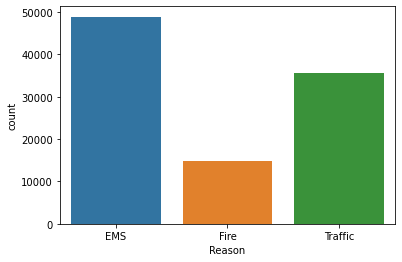

In [125]:
sns.countplot(x = 'Reason', data = df)    # or: sns.countplot(df['Reason']) 

#### Q6) What is the data type of the objects in the timeStamp column?

In [126]:
type(df['timeStamp'])    # The column itself is a Pandas series. So:
type(df['timeStamp'][0])    # The values within the column are strings
# This datatype distinction is important as, for example in MySQL too, it could have been a DATETIME or TIMESTAMP object
type(df['timeStamp'].iloc[0])    # Also possible

str

#### Q7) Convert the column from strings to datetime objects

In [127]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [128]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

#### Q8) Create 3 new columns called Hour, Month, and Day of Week based off of the timeStamp column

In [129]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


In [130]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [131]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3


In [132]:
dict_day = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day of week'] = df['Day of week'].map(dict_day)

In [133]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu


#### Q9) Use seaborn to create a countplot of the Day of Week and Month columns with visual differentation based off of the Reason column

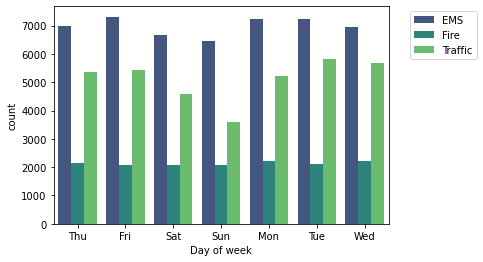

In [141]:
sns.countplot(x = 'Day of week', data = df, hue = 'Reason', palette = 'viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

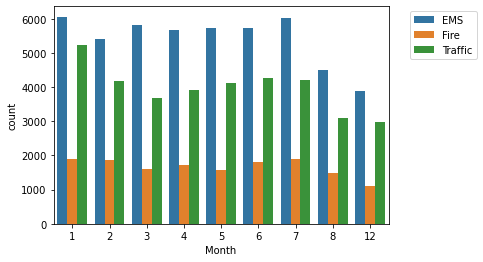

In [143]:
sns.countplot(x = 'Month', data = df, hue = 'Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

There is missing data: months 9, 10 & 11 are missing

#### Q10) Group by the month column and aggregate it

In [146]:
byMonth = df.groupby(by = 'Month').count()

In [148]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


#### Q11) Create a simple plot off of the dataframe indicating the count of calls per month

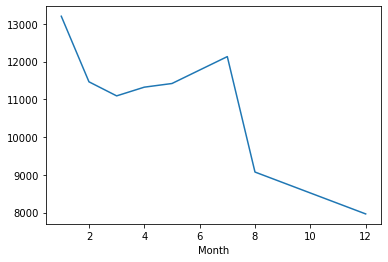

In [150]:
byMonth['twp'].plot()    # could be any column

#### Q12) Create a linear fit via seaborn on the number of calls per month

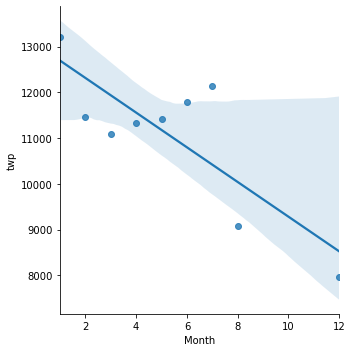

In [152]:
sns.lmplot(x = 'Month', y = 'twp', data = byMonth.reset_index())  
# reset the index to a column

#### Q13) Create a new column called 'Date' that contains the date from the timeStamp column. Groupby this Date column with aggregation and create a plot of counts of 911 calls

In [153]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu


In [154]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

In [155]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10


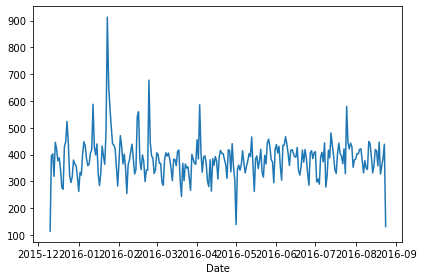

In [160]:
df.groupby('Date').count()['twp'].plot()    # again: could be any column
plt.tight_layout()

#### Q14) Create a similar plot but representing the fire Reason for the 911 call

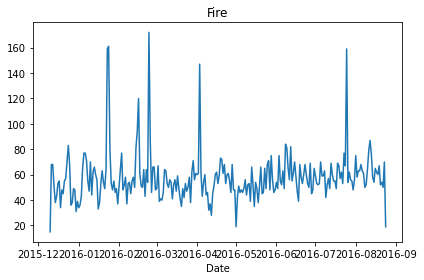

In [162]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

#### Q15) Create a similar plot, but as a heatmap + clustermap, and for the hours & day of the week

Remember: heatmaps require a matrix form. We can do this by turning our df into a pivot table or with the groupby & unstack method
<br>
<br>
<br>
df.unstack(): Pivot a level of the (necessarily hierarchical) index labels.

Returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.

If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex).

In [171]:
day_hour = df.groupby(by=['Day of week','Hour']).count()['Reason'].unstack()
day_hour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


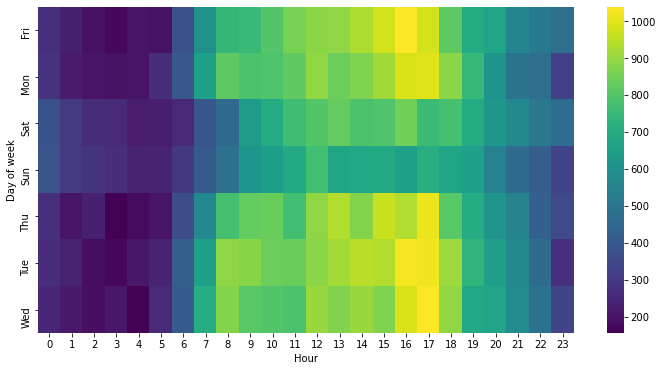

In [173]:
plt.figure(figsize=(12,6))
sns.heatmap(day_hour,cmap='viridis')

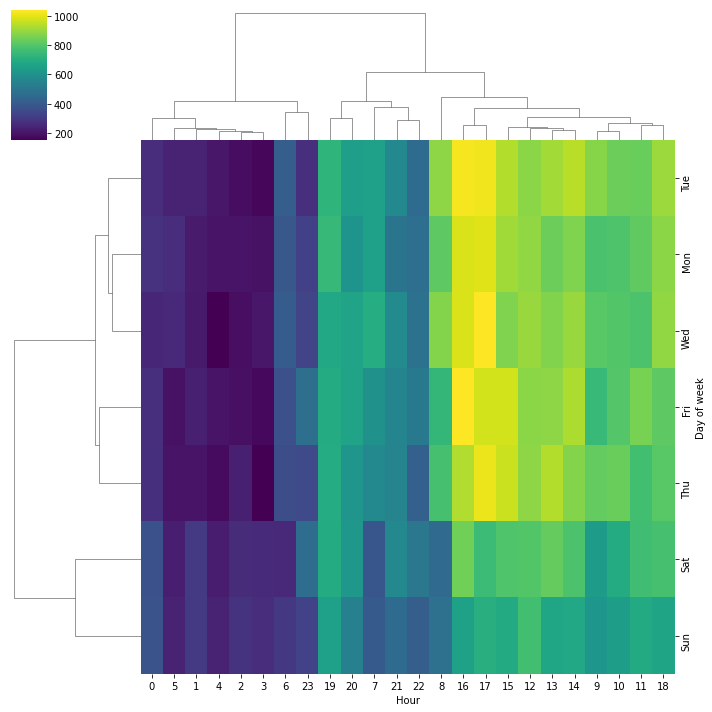

In [174]:
sns.clustermap(day_hour,cmap='viridis')